<a href="https://colab.research.google.com/github/KehEatCode/Projects/blob/main/Tried1-DVA_Capstone_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Milestone 1**

## **Context**
 - Why is this problem important to solve?

### **The objectives:**

 - What is the intended goal?

### **The key questions:**

- What are the key questions that need to be answered?



### **The problem formulation**:

- What is it that we are trying to solve using data science?

------------------------------
## **Data Dictionary**
------------------------------

The dataset contains the following features:

1. ID: Unique ID of each customer
2. Year_Birth: Customer’s year of birth
3. Education: Customer's level of education
4. Marital_Status: Customer's marital status
5. Kidhome: Number of small children in customer's household
6. Teenhome: Number of teenagers in customer's household
7. Income: Customer's yearly household income in USD
8. Recency: Number of days since the last purchase
9. Dt_Customer: Date of customer's enrollment with the company
10. MntFishProducts: The amount spent on fish products in the last 2 years
11. MntMeatProducts: The amount spent on meat products in the last 2 years
12. MntFruits: The amount spent on fruits products in the last 2 years
13. MntSweetProducts: Amount spent on sweet products in the last 2 years
14. MntWines: The amount spent on wine products in the last 2 years
15. MntGoldProds: The amount spent on gold products in the last 2 years
16. NumDealsPurchases: Number of purchases made with discount
17. NumCatalogPurchases: Number of purchases made using a catalog (buying goods to be shipped through the mail)
18. NumStorePurchases: Number of purchases made directly in stores
19. NumWebPurchases: Number of purchases made through the company's website
20. NumWebVisitsMonth: Number of visits to the company's website in the last month
21. AcceptedCmp1: 1 if customer accepted the offer in the first campaign, 0 otherwise
22. AcceptedCmp2: 1 if customer accepted the offer in the second campaign, 0 otherwise
23. AcceptedCmp3: 1 if customer accepted the offer in the third campaign, 0 otherwise
24. AcceptedCmp4: 1 if customer accepted the offer in the fourth campaign, 0 otherwise
25. AcceptedCmp5: 1 if customer accepted the offer in the fifth campaign, 0 otherwise
26. Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
27. Complain: 1 If the customer complained in the last 2 years, 0 otherwise

**Note:** You can assume that the data is collected in the year 2016.

## **Important Notes**

- This notebook can be considered a guide to refer to while solving the problem. The evaluation will be as per the Rubric shared for each Milestone. Unlike previous courses, it does not follow the pattern of the graded questions in different sections. This notebook will give you a direction on what steps need to be taken in order to get a viable solution to the problem. Please note that this is just one way of doing this. There can be other 'creative' ways to solve the problem and we urge you to feel free and explore them as an 'optional' exercise. 

- In the notebook, there are markdown cells called - Observations and Insights. It is a good practice to provide observations and extract insights from the outputs.

- The naming convention for different variables can vary. Please consider the code provided in this notebook as a sample code.

- All the outputs in the notebook are just for reference and can be different if you follow a different approach.

- There are sections called **Think About It** in the notebook that will help you get a better understanding of the reasoning behind a particular technique/step. Interested learners can take alternative approaches if they wish to explore different techniques. 

# **Milestone 1** 

### **Loading Libraries**

In [1]:
pip install scikit-learn-extra

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To scale the data using z-score
from sklearn.preprocessing import StandardScaler

# To compute distances
from scipy.spatial.distance import cdist

# To perform K-means clustering and compute Silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# To visualize the elbow curve and Silhouette scores
from yellowbrick.cluster import SilhouetteVisualizer

# Importing PCA
from sklearn.decomposition import PCA

# To encode the variable
from sklearn.preprocessing import LabelEncoder

# Importing TSNE
from sklearn.manifold import TSNE

# To perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# To compute distances
from scipy.spatial.distance import pdist

# To import K-Medoids
from sklearn_extra.cluster import KMedoids

# To import Gaussian Mixture
from sklearn.mixture import GaussianMixture

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

### **Let us load the data**

In [3]:
from google.colab import files
upload = files.upload()

Saving marketing_campaign.csv to marketing_campaign (1).csv


In [4]:
# loading the dataset
data = pd.read_csv("marketing_campaign.csv")

### **Check the shape of the data**

In [5]:
# Print the shape of the data
data.shape

(2240, 27)

#### **Observations and Insights: _____**

### **Understand the data by observing a few rows**

In [6]:
# View first 5 rows
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,3,6,5,0,0,0,0,0,0,0


In [7]:
# View last 5 rows Hint: Use tail() method
data.tail()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,3,4,5,0,0,0,0,0,0,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,2,5,7,0,0,0,1,0,0,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,3,13,6,0,1,0,0,0,0,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,5,10,3,0,0,0,0,0,0,0
2239,9405,1954,PhD,Married,52869.0,1,1,15-10-2012,40,84,...,1,4,7,0,0,0,0,0,0,1


#### **Observations and Insights: _____**

### **Let us check the data types and and missing values of each column** 

In [8]:
# Check the datatypes of each column. Hint: Use info() method
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [9]:
# Find the percentage of missing values in each column of the data
data.isnull().sum()*100 / len(data)

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Response               0.000000
dtype: float64

#### **Observations and Insights: _____**

We can observe that `ID` has no null values. Also the number of unique values are equal to the number of observations. So, `ID` looks like an index for the data entry and such a column would not be useful in providing any predictive power for our analysis. Hence, it can be dropped.

**Dropping the ID column**

In [10]:
# Remove ID column from data. Hint: Use inplace = True
data.drop(['ID'],axis=1, inplace=True)

In [11]:
data

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,...,10,4,7,0,0,0,0,0,0,1
1,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,...,1,2,5,0,0,0,0,0,0,0
2,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,...,2,10,4,0,0,0,0,0,0,0
3,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,...,0,4,6,0,0,0,0,0,0,0
4,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,...,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,...,3,4,5,0,0,0,0,0,0,0
2236,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,...,2,5,7,0,0,0,1,0,0,0
2237,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,...,3,13,6,0,1,0,0,0,0,0
2238,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,...,5,10,3,0,0,0,0,0,0,0


## **Exploratory Data Analysis**

### **Let us now explore the summary statistics of numerical variables**

In [12]:
# Explore basic summary statistics of numeric variables. Hint: Use describe() method.
data.describe()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
count,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,...,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.012946,0.009375,0.149107
std,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,...,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.113069,0.096391,0.356274
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,...,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,...,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### **Observations and Insights: _____**

### **Let us also explore the summary statistics of all categorical variables and the number of unique observations in each category**

In [13]:
# List of the categorical columns in the data
cols = ["Education", "Marital_Status", "Kidhome", "Teenhome", "Complain"]

**Number of unique observations in each category**

In [14]:
for column in cols:
    print("Unique values in", column, "are :")
    print(data[column].value_counts(normalize=True))
    print("*" * 50)

Unique values in Education are :
Graduation    0.503125
PhD           0.216964
Master        0.165179
2n Cycle      0.090625
Basic         0.024107
Name: Education, dtype: float64
**************************************************
Unique values in Marital_Status are :
Married     0.385714
Together    0.258929
Single      0.214286
Divorced    0.103571
Widow       0.034375
Alone       0.001339
Absurd      0.000893
YOLO        0.000893
Name: Marital_Status, dtype: float64
**************************************************
Unique values in Kidhome are :
0    0.577232
1    0.401339
2    0.021429
Name: Kidhome, dtype: float64
**************************************************
Unique values in Teenhome are :
0    0.516964
1    0.459821
2    0.023214
Name: Teenhome, dtype: float64
**************************************************
Unique values in Complain are :
0    0.990625
1    0.009375
Name: Complain, dtype: float64
**************************************************


#### **Observations and Insights: _____**

**Think About It:**

- We could observe from the summary statistics of categorical variables that the Education variable has 5 categories. Are all categories different from each other or can we combine some categories? Is 2n Cycle different from Master? 
- Similarly, there are 8 categories in Marital_Status with some categories having very low count of less than 5. Can we combine these categories with other categories? 

### **Let us replace  the "2n Cycle" category with "Master" in Education and "Alone", "Absurd, and "YOLO" with "Single" in Marital_Status**

In [15]:
# Replace the category "2n Cycle" with the category "Master"

data["Education"].replace('2n Cycle','Master',inplace=True)  # Hint: Use the replace() method and inplace=True

In [16]:
# Replace the categories "Alone", "Abusrd", "YOLO" with the category "Single"

data["Marital_Status"].replace(('Alone','Abusrd','YOLO'),'Single',inplace=True)  # Hint: Use the replace() method and inplace=True

## **Univariate Analysis**
Univariate analysis is used to explore each variable in a data set, separately. It looks at the range of values, as well as the central tendency of the values. It can be done for both numerical and categorical variables.

## **1. Univariate Analysis - Numerical Data**
Histograms help to visualize and describe numerical data. We can also use other plots like box plot to analyze the numerical columns.

#### Let us plot histogram for the feature 'Income' to understand the distribution and outliers, if any.

In [17]:
# List of the categorical columns in the data
categoricals = ["Education", "Marital_Status", "Kidhome", "Teenhome", "Complain"]

In [18]:
numericals = []
for col in data.columns:
    if not col in categoricals:
        numericals.append(col)

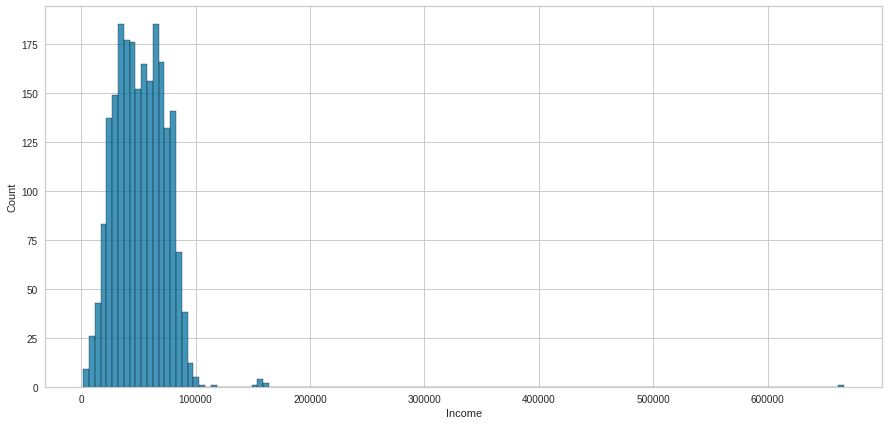

In [19]:
# Create histogram for the Income feature

plt.figure(figsize=(15, 7))
sns.histplot(x='Income', data=data[numericals])
plt.show()

**We could observe some extreme value on the right side of the distribution of the 'Income' feature. Let's use a box plot as it is more suitable to identify extreme values in the data.** 

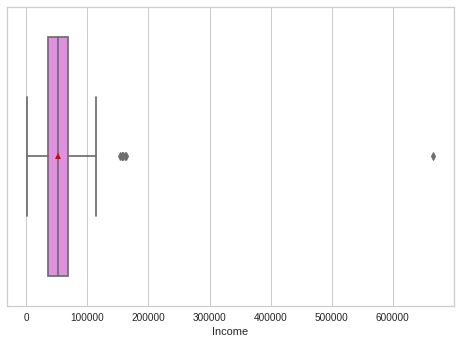

In [20]:
# Plot the boxplot
sns.boxplot(data=data[numericals], x='Income', showmeans=True, color="violet")

#### **Observations and Insights: _____**

**Think About It**

- The histogram and the box plot are showing some extreme value on the right side of the distribution of the 'Income' feature. Can we consider them as outliers and remove or should we analyze these extreme values?

In [21]:
# Calculating the upper whisker for the Income variable

Q1 = data.quantile(q=0.25)                          # Finding the first quartile

Q3 = data.quantile(q=0.75)                         # Finding the third quartile

IQR = Q3-Q1                                    # Finding the Inter Quartile Range

upper_whisker = (Q3 + 1.5 * IQR)['Income']          # Calculating the Upper Whisker for the Income variable

print(upper_whisker)                                # Printing Upper Whisker

118350.5


In [22]:
# Let's check the observations with extreme value for the Income variable
data[data.Income > upper_whisker]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
164,1973,PhD,Married,157243.0,0,1,01-03-2014,98,20,2,...,22,0,0,0,0,0,0,0,0,0
617,1976,PhD,Together,162397.0,1,1,03-06-2013,31,85,1,...,0,1,1,0,0,0,0,0,0,0
655,1975,Graduation,Divorced,153924.0,0,0,07-02-2014,81,1,1,...,0,0,0,0,0,0,0,0,0,0
687,1982,PhD,Married,160803.0,0,0,04-08-2012,21,55,16,...,28,1,0,0,0,0,0,0,0,0
1300,1971,Master,Together,157733.0,1,0,04-06-2013,37,39,1,...,0,1,1,0,0,0,0,0,0,0
1653,1977,Graduation,Together,157146.0,0,0,29-04-2013,13,1,0,...,28,0,1,0,0,0,0,0,0,0
2132,1949,PhD,Married,156924.0,0,0,29-08-2013,85,2,1,...,0,0,0,0,0,0,0,0,0,0
2233,1977,Graduation,Together,666666.0,1,0,02-06-2013,23,9,14,...,1,3,6,0,0,0,0,0,0,0


**Think About It:**

- We observed that there are only a few rows with extreme values for the Income variable. Is that enough information to treat (or not to treat) them? Do we know at what percentile the upper whisker lies? 

In [23]:
# Check the 99.5% percentile value for the Income variable
data.quantile(q=0.9955)['Income']

102782.3175000007

#### **Observations and Insights: _____**

In [24]:
# Dropping observations identified as outliers 
data.drop(index=[2233], inplace=True) # Pass the indices of the observations (separated by a comma) to drop them

**Now, let's check the distribution of the Income variable after dropping outliers.**

In [25]:
import matplotlib.pyplot as plt

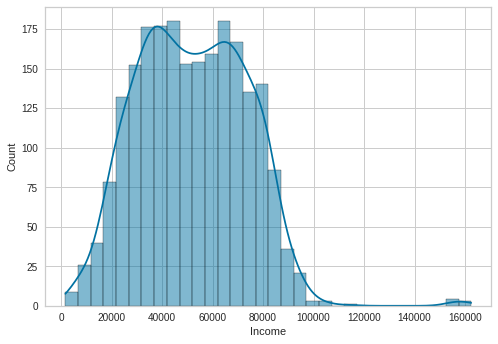

In [26]:
# Plot histogram and 'Income'
sns.histplot(x='Income', data=data, kde=True)

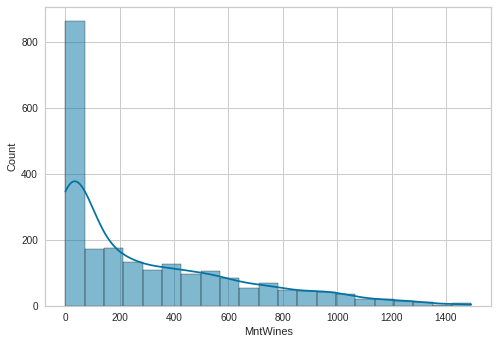

In [27]:
# Plot the histogram for 'MntWines'
sns.histplot(x='MntWines', data=data, kde=True)

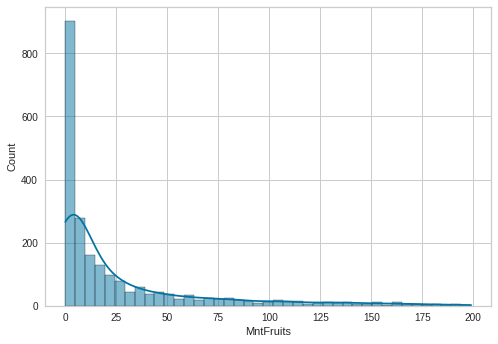

In [28]:
# Plot the histogram for 'MntFruits'
sns.histplot(x='MntFruits', data=data, kde=True)

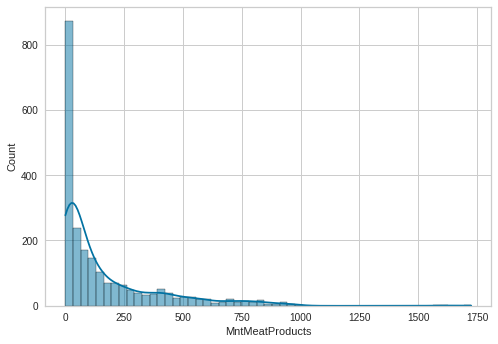

In [29]:
# Plot the histogram for 'MntMeatProducts' 
sns.histplot(x='MntMeatProducts', data=data, kde=True)

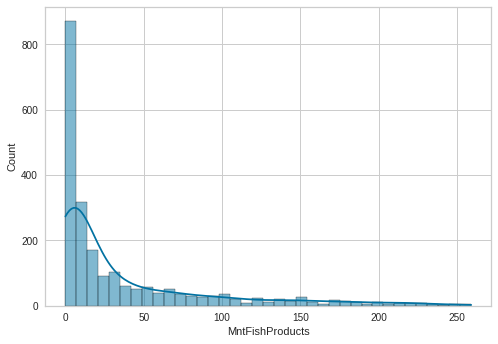

In [30]:
# Plot the histogram for 'MntFishProduct'
sns.histplot(x='MntFishProducts', data=data, kde=True)

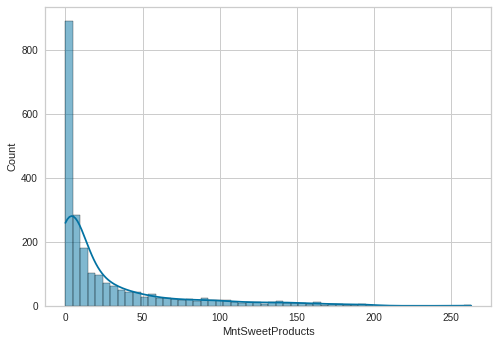

In [31]:
# Plot the histogram for 'MntSweetProducts'
sns.histplot(x='MntSweetProducts', data=data, kde=True)

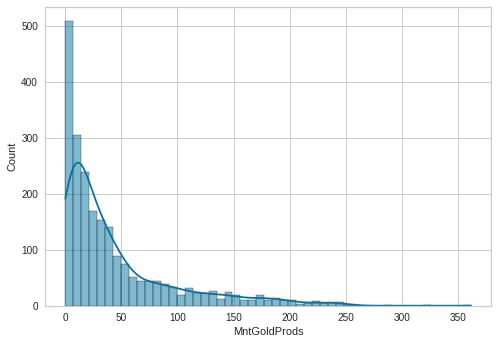

In [32]:
# Plot the histogram for 'MntGoldProducts'
sns.histplot(x='MntGoldProds', data=data, kde=True)

#### **Note:** Try plotting histogram for different numerical features and understand how the data looks like.

#### **Observations and Insights for all the plots: _____**

## **2. Univariate analysis - Categorical Data**

Let us write a function that will help us create bar plots that indicate the percentage for each category. This function takes the categorical column as the input and returns the bar plot for the variable.

In [33]:
def perc_on_bar(z):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''

    total = len(data[z])                                          # Length of the column
    plt.figure(figsize=(15,5))
    ax = sns.countplot(data[z],palette='Paired',order = data[z].value_counts().index)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # Percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05                  # Width of the plot
        y = p.get_y() + p.get_height()                            # Height of the plot
        
        ax.annotate(percentage, (x, y), size = 12)                # Annotate the percentage 
    
    plt.show()                                                    # Show the plot

#### Let us plot barplot for the variable Marital_Status.

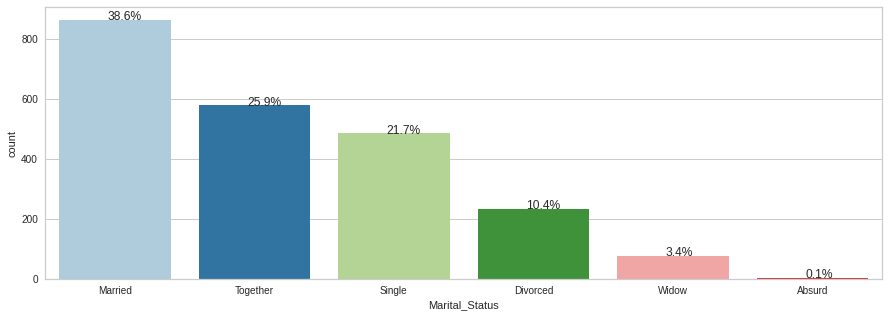

In [34]:
# Bar plot for 'Marital_Status'
perc_on_bar('Marital_Status')

#### **Note:** Explore for other categorical variables like Education, Kidhome, Teenhome, Complain.

#### **Observations and Insights from all plots: _____**

## **Bivariate Analysis**

We have analyzed different categorical and numerical variables. Now, let's check how different variables are related to each other.

### **Correlation Heat map**
Heat map can show a 2D correlation matrix between numerical features.

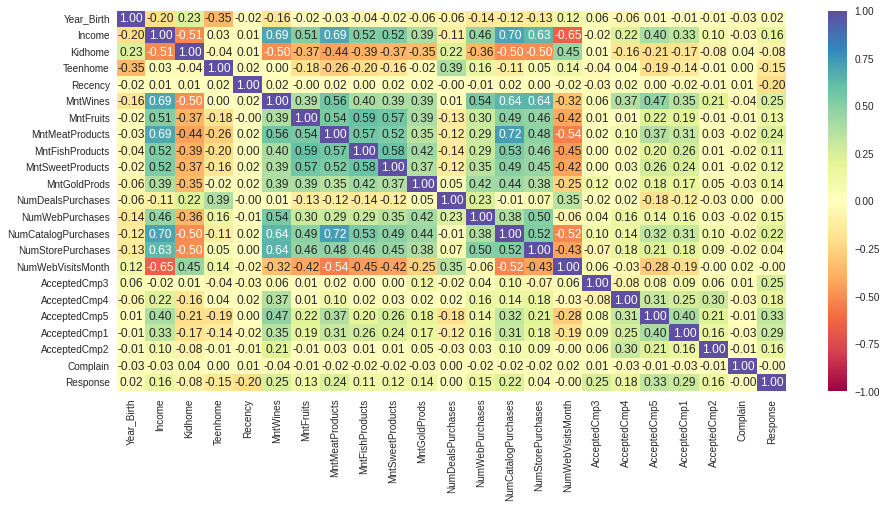

In [35]:
plt.figure(figsize=(15, 7))                                                        # Setting the plot size
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")  # Plotting the correlation plot
plt.show()

#### **Observations and Insights: _____**

**The above correlation heatmap only shows the relationship between numerical variables. Let's check the relationship of numerical variables with categorical variables.**

### **Education Vs Income**

AxesSubplot(0.125,0.125;0.775x0.755)


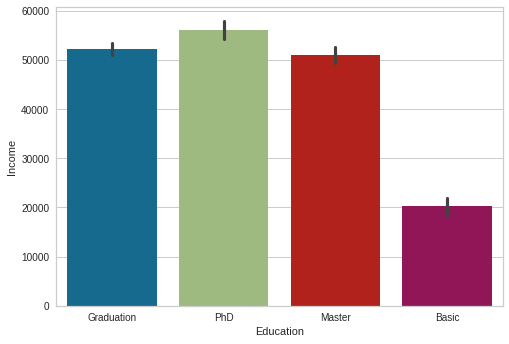

In [36]:
print(sns.barplot(x='Education', y='Income', data=data))

#### **Observations and Insights: _____**

### **Marital Status Vs Income**

AxesSubplot(0.125,0.125;0.775x0.755)


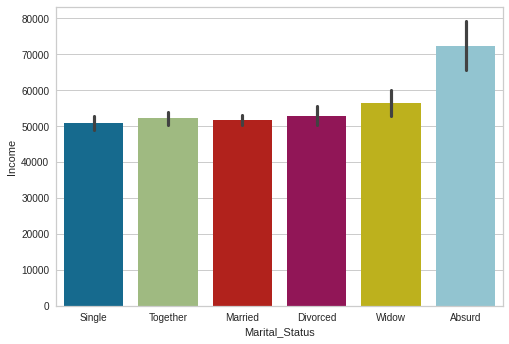

In [37]:
# Plot the bar plot for Marital_Status and Income
print(sns.barplot(x='Marital_Status', y='Income', data=data))

#### **Observations and Insights: _____**

### **Kidhome Vs Income**

AxesSubplot(0.125,0.125;0.775x0.755)


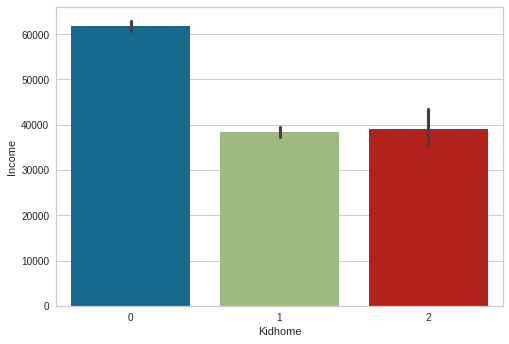

In [38]:
# Plot the bar plot for Kidhome and Income
print(sns.barplot(x='Kidhome', y='Income', data=data))

#### **Observations and Insights: _____**

**We can also visualize the relationship between two categorical variables.**

### **Marital_Status Vs Kidhome**

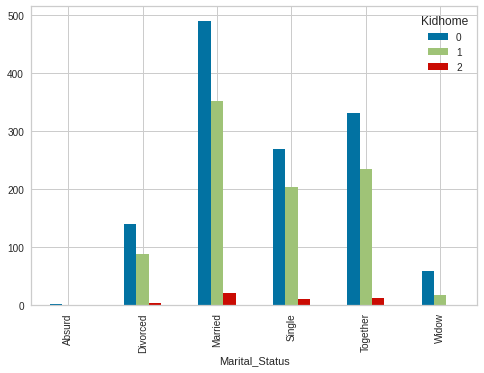

In [39]:
# Plot the bar plot for Marital_Status and Kidhome
pd.crosstab(index=data['Marital_Status'],columns=data['Kidhome']).plot(kind='bar',stacked=False)

#### **Observations and Insights: _____**

## **Feature Engineering and Data Processing**

In this section, we will first prepare our dataset for analysis.
- Creating new columns
- Imputing missing values

**Think About It:**

- The Year_Birth column in the current format might not be very useful in our analysis. The Year_Birth column contains the information about Day, Month, and year. Can we extract the age of each customer?
- Are there other columns which can be used to create new features?

### **Age** 

In [40]:
# Extract only the year from the Year_Birth variable and subtracting it from 2016 will give us the age of the customer at the time of data collection in 2016

Age= data["Age"] = 2016 - pd.to_datetime(data['Year_Birth'], format="%Y").apply(lambda x: x.year) 

# Sorting the values in ascending order 
data["Age"].sort_values()                                         

1170     20
46       20
747      21
2213     21
995      21
       ... 
424      75
1950     76
192     116
339     117
239     123
Name: Age, Length: 2239, dtype: int64

#### **Observations and Insights: _____**

**Think About It:**

- We could observe from the above output that there are customers with an age greater than 115. Can this be true or a data anomaly? Can we drop these observations?

In [41]:
Age

0       59
1       62
2       51
3       32
4       35
        ..
2235    49
2236    70
2237    35
2238    60
2239    62
Name: Year_Birth, Length: 2239, dtype: int64

In [42]:
# Drop the observations with age > 115
# Hint: Use drop() method with inplace=True
data.drop(data[Age>115].index, inplace=True)


**Now, let's check the distribution of age in the data.**

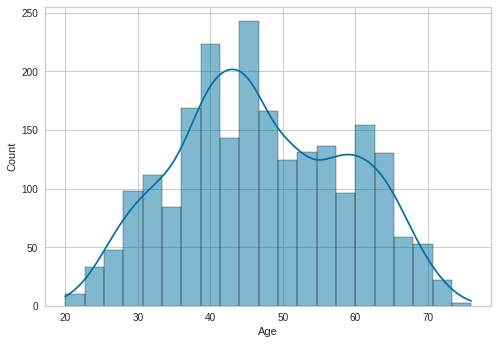

In [43]:
# Plot histogram to check the distribution of age
sns.histplot(x='Age', data=data, kde=True)

#### **Observations and Insights: _____**

### **Kids** 
* Let's create feature "Kids" indicating the total kids and teens in the home.

In [44]:
# Add Kidhome and Teenhome variables to create the new feature called "Kids"
data['Kids'] = data.loc[:,['Kidhome','Teenhome']].sum(axis=1)

### **Family Size**
* Let's create a new variable called 'Family Size' to find out how many members each family has.
* For this, we need to have a look at the Marital_Status variable, and see what are the categories.

In [45]:
# Check the unique categories in Marial_Status
data['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Absurd'],
      dtype=object)

* We can combine the sub-categories Single, Divorced, Widow as "Single" and we can combine the sub-categories Married and Together as "Relationship" 
* Then we can create a new variable called "Status" and assign values 1 and 2 to categories Single and Relationship, respectively.
* Then, we can use the Kids (calculated above) and the Status column to find the family size.

In [46]:
# Replace "Married" and "Together" with "Relationship"
data["Marital_Status"].replace(('Married','Together'),'Relationship',inplace=True)

In [47]:
# Replace "Divorced" and "Widow" with "Single"
data["Marital_Status"].replace(('Divorced','Widow'),'Single',inplace=True)

In [48]:
# Create a new feature called "Status" by replacing "Single" with 1 and "Relationship" with 2 in Marital_Status
data["Status"] = data['Marital_Status'].replace({'Single': 1, 'Relationship': 2}) 

In [49]:
# Add two variables Status and Kids to get the total number of persons in each family
data['Family_Size'] = data.loc[:,['Status','Kids']].sum(axis=1)

### **Expenses** 
* Let's create a new feature called "Expenses", indicating the total amount spent by the customers in various products over the span of two years.

In [50]:
# Create a new feature
# Add the amount spent on each of product 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'
data['Expenses'] = data.loc[:,['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']].sum(axis=1)

### **Total Purchases**
* Let's create a new feature called "NumTotalPurchases", indicating the total number of products purchased by the customers.

In [51]:
# Create a new feature
# Add the number of purchases from each channel 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases'
data["NumTotalPurchases"] = data.loc[:,['NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases']].sum(axis=1)

### **Engaged in Days**
* Let's create a new feature called "Engaged in days", indicating how long the customer has been with the company.

In [52]:
# Converting Dt_customer variable to Python date time object
data["Dt_Customer"] = pd.to_datetime(data['Dt_Customer']) 

**Let's check the max and min of the date.**

In [53]:
# Check the minimum of the date
# Hint: Use the min() method
data['Dt_Customer'].min()

Timestamp('2012-01-08 00:00:00')

In [54]:
# Check the maximum of the date
# Hint: Use the max() method
data['Dt_Customer'].max()

Timestamp('2014-12-06 00:00:00')

**Think About It:**
- From the above output from the max function, we observed that the last customer enrollment date is December 6th, 2014. Can we extract the number of days a customer has been with the company using some date as the threshold? Can January 1st, 2015 be that threshold?

In [55]:
 # Assigning date to the day variable
data["day"] = "01-01-2015"                         

# Converting the variable day to Python datetime object
data["day"] = pd.to_datetime(data.day)              

In [56]:
data["Engaged_in_days"] = (data["day"] - data["Dt_Customer"]).dt.days     

### **TotalAcceptedCmp**
* Let's create a new feature called "TotalAcceptedCmp" that shows how many offers customers have accepted.

In [57]:
# Add all the campaign related variables to get the total number of accepted campaigns by a customer
# "AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", "Response"
data["TotalAcceptedCmp"] =  data.loc[:,['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response']].sum(axis=1)

### **AmountPerPurchase**
* Let's create a new feature called "AmountPerPurchase" indicating the amount spent per purchase.

In [58]:
# Divide the "Expenses" by "NumTotalPurchases" to create the new feature AmountPerPurchase 
data['AmountPerPurchase'] = data['Expenses']/data['NumTotalPurchases']

**Now, let's check the maximum value of the AmountPerPurchase.**

In [59]:
# Check the max value
# Hint: Use max() function
data['AmountPerPurchase'].max()

inf

**Think About It:**

- Is the maximum value in the above output valid? What could be the potential reason for such output?
- How many such values are there? Can we drop such observations?

In [60]:
data.loc[data.NumTotalPurchases == 0, 'NumTotalPurchases'].count()

4

In [61]:
# Drop the observations with NumTotalPurchases equal to 0, using their indices
data.drop(data.loc[data['NumTotalPurchases']==0].index, inplace=True)

**Now, let's check the distribution of values in AmountPerPurchase column.**

In [62]:
# Check the summary statistics of the AmountPerPurchase variable 
data['AmountPerPurchase'].describe()

count    2232.000000
mean       33.325523
std        45.022235
min         0.533333
25%         9.714286
50%        23.386752
75%        45.353365
max      1679.000000
Name: AmountPerPurchase, dtype: float64

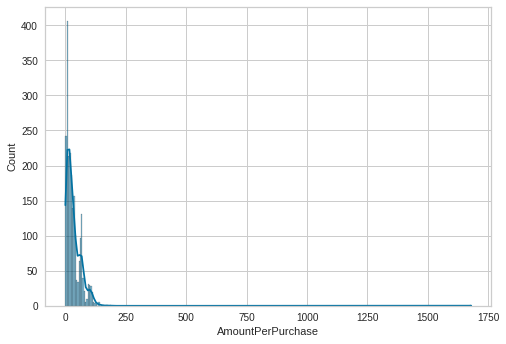

In [63]:
# Plot the histogram for the AmountPerPurchas variable
sns.histplot(x='AmountPerPurchase', data=data, kde=True)

#### **Observations and Insights: _____**

### **Imputing Missing Values**

In [64]:
# Impute the missing values for the Income variable with the median
data['Income'] = data['Income'].fillna(data['Income'].median())

**Now that we are done with data preprocessing, let's visualize new features against the new income variable we have after imputing missing values.**

### **Income Vs Expenses**

Text(0, 0.5, 'Expenses')

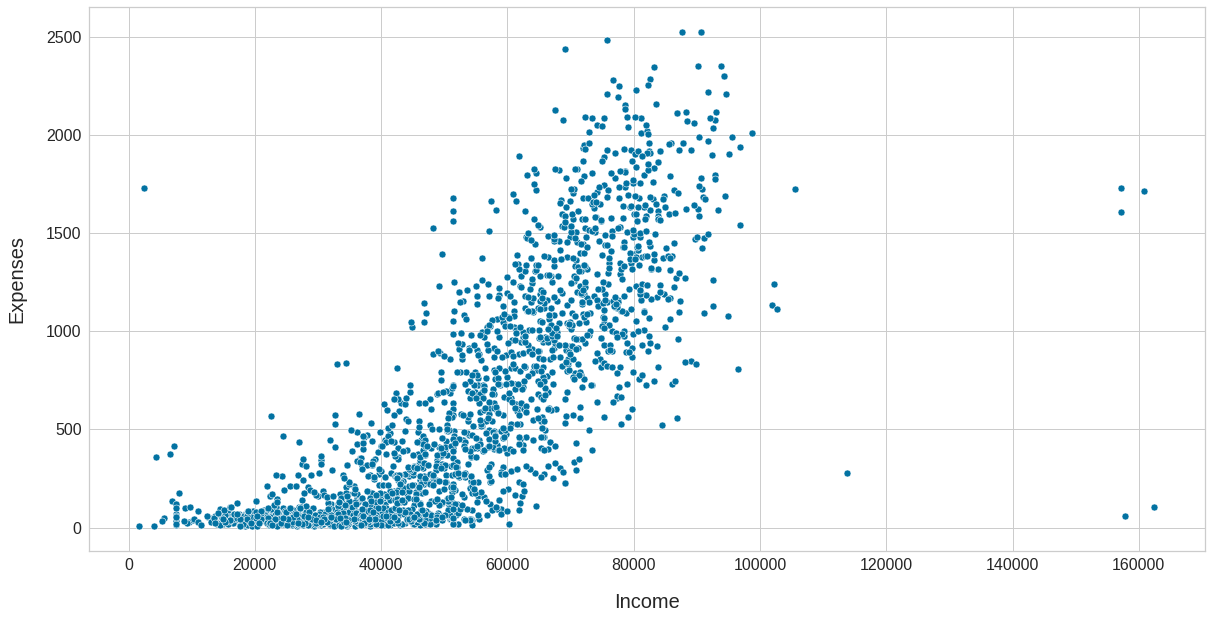

In [65]:
# Plot the scatter plot with Expenses on Y-axis and Income on X-axis  

plt.figure(figsize=(20, 10))                                    # Setting the plot size

sns.scatterplot(data["Income"],data['Expenses'],palette="PuBu")                                     # Hint: Use sns.scatterplot()  

plt.xticks(fontsize=16)                                         # Font size of X-label

plt.yticks(fontsize=16)                                         # Font size of Y-label

plt.xlabel("Income", fontsize=20, labelpad=20)                  # Title of X-axis

plt.ylabel("Expenses", fontsize=20, labelpad=20)                # Title of Y-axis

#### **Observations and Insights: _____**

### **Family Size Vs Income**

AxesSubplot(0.125,0.125;0.775x0.755)


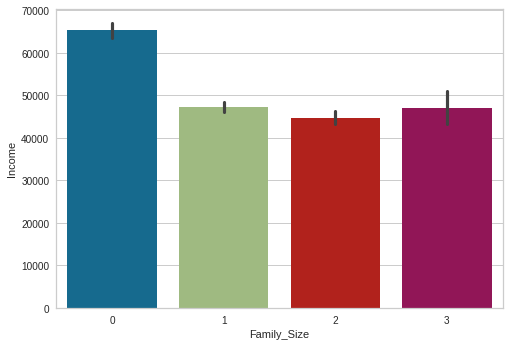

In [66]:
# Plot the bar plot for Family Size on X-axis and Income on Y-axis

print(sns.barplot(x='Family_Size', y='Income', data=data))

#### **Observations and Insights: _____**

## **Proposed approach**

- **Potential techniques -** What different techniques should be explored?
- **Overall solution design -** What is the potential solution design?
- **Measures of success -** What are the key measures of success?

# **Customer Segmentation**

# **Milestone 2**

**Note:** This is in continuation to the data preprocessing we did in Milestone 1. Results might differ if you have followed different steps in data preprocessing. 

## Preparing Data for Segmentation

### Dropping columns that we will not use for segmentation

The decision about which variables to use for clustering is a critically important decision that will have a big impact on the clustering solution. So we need to think carefully about the variables we will choose for clustering. Clearly, this is a step where a lot of contextual knowledge, creativity, and experimentation/iterations are needed.

Moreover, we often use only a few of the data attributes for segmentation (the segmentation attributes) and use some of the remaining ones (the profiling attributes) only to profile the clusters. For example, in market research and market segmentation, we can use behavioral data for segmentation (to segment the customers based on their behavior like amount spent, units bought, etc.), and then use both demographic as well as behavioral data for profiling the segments found.

Here, we will use the behavioral attributes for segmentation and drop the demographic attributes like Income, Age, and Family_Size. In addition to this, we need to drop some other columns which are mentioned below.

* `Dt_Customer`: We have created the `Engaged_in_days` variable using the Dt_Customer variable. Hence, we can drop this variable as it will not help with segmentation.
* `Complain`: About 95% of the customers didn't complain and have the same value for this column. This variable will not have a major impact on segmentation. Hence, we can drop this variable. 
* `day`:  We have created the `Engaged_in_days` variable using the 'day' variable. Hence, we can drop this variable as it will not help with segmentation.
* `Status`: This column was created just to get the `Family_Size` variable that contains the information about the Status. Hence, we can drop this variable.
* We also need to drop categorical variables like `Education` and `Marital_Status`, `Kids`, `Kidhome`, and `Teenhome` as distance-based algorithms cannot use the default distance like Euclidean to find the distance between categorical and numerical variables.
* We can also drop categorical variables like `AcceptedCmp1`, `AcceptedCmp2`, `AcceptedCmp3`, `AcceptedCmp4`, `AcceptedCmp5`, and `Response` for which we have create the variable `TotalAcceptedCmp` which is the aggregate of all these variables.

In [67]:
# Dropping all the irrelevant columns and storing in data_model
data_model = data.drop(
    columns=[
        "Year_Birth",
        "Dt_Customer",
        "day",
        "Complain",
        "Response",
        "AcceptedCmp1",
        "AcceptedCmp2",
        "AcceptedCmp3",
        "AcceptedCmp4",
        "AcceptedCmp5",
        "Marital_Status",
        "Status",
        "Kids",
        'Education',
        'Kidhome',
        'Teenhome', 'Income','Age', 'Family_Size'
    ],
    axis=1,
)

In [68]:
# Check the shape of new data 
data_model.shape

(2232, 17)

In [69]:
# Check first five rows of new data
data_model.head()

,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Expenses,NumTotalPurchases,Engaged_in_days,TotalAcceptedCmp,AmountPerPurchase
0,58,635,88,546,172,88,88,3,8,10,4,7,1617,25,997,1,64.680000
1,38,11,1,6,2,1,6,2,1,1,2,5,27,6,151,0,4.500000
2,26,426,49,127,111,21,42,1,8,2,10,4,776,21,498,0,36.952381
3,26,11,4,20,10,3,5,2,2,0,4,6,53,8,91,0,6.625000
4,94,173,43,118,46,27,15,5,5,3,6,5,422,19,347,0,22.210526


**Let's plot the correlation plot after we've removed the irrelevant variables.**

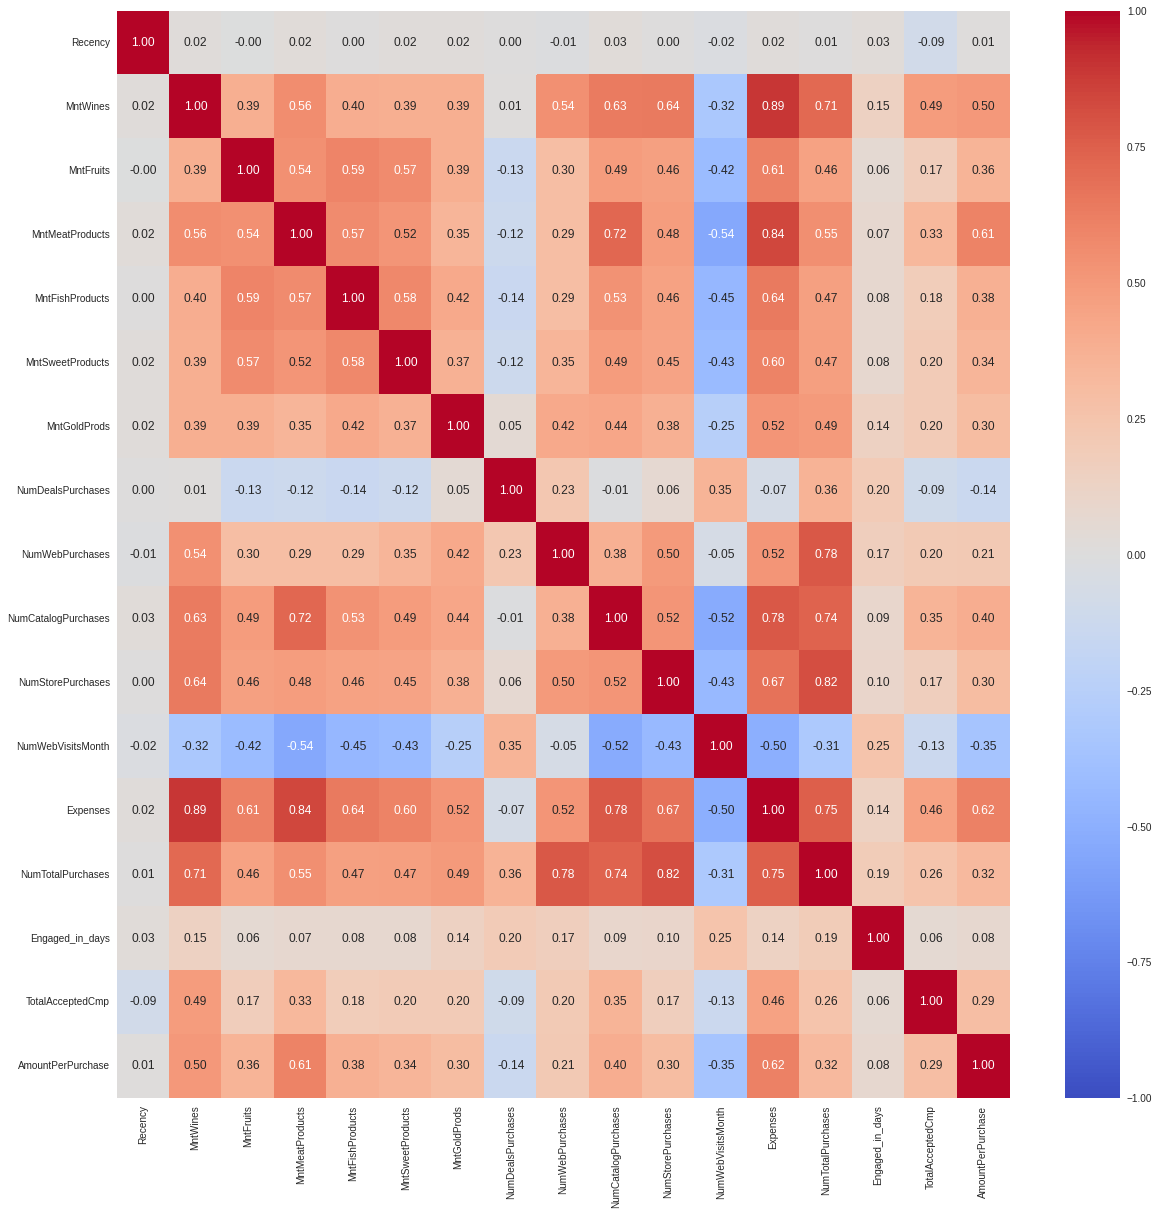

In [70]:
# Plot the correlation plot for new data
corr = data_model.corr()
plt.figure(figsize=(20,20))
sns.heatmap(data_model.corr(), annot=True, cmap='coolwarm',vmax=1,vmin=-1,
        fmt=".2f",
        xticklabels=corr.columns,
        yticklabels=corr.columns);

**Observations and Insights:**

### Scaling the Data

**What is feature scaling?**

Feature scaling is a class of statistical techniques that, as the name implies, scales the features of our data so that they all have a similar range. You'll understand better if we look at an example:

If you have multiple independent variables like Age, Income, and Amount related variables, with their range as (18–100 Years), (25K–75K), and (100–200), respectively, feature scaling would help them all to be in the same range.

**Why feature scaling is important in Unsupervised Learning?**

Feature scaling is especially relevant in machine learning models that compute some sort of distance metric as we do in most clustering algorithms, for example, K-Means. 

So, scaling should be done to avoid the problem of one feature dominating over others because the unsupervised learning algorithm uses distance to find the similarity between data points.

**Let's scale the data**

**Standard Scaler**: StandardScaler standardizes a feature by subtracting the mean and then scaling to unit variance. Unit variance means dividing all the values by the standard deviation.

![SC.png](attachment:SC.png)

1. Data standardization is the process of rescaling the attributes so that they have a mean of 0 and a variance of 1.
2. The ultimate goal to perform standardization is to bring down all the features to a common scale without distorting the differences in the range of the values.
3. In sklearn.preprocessing.StandardScaler(), centering and scaling happen independently on each feature.

In [71]:
# Applying standard scaler on new data
scaler = StandardScaler()                                                   # Initialize the Standard Scaler

df_scaled = scaler.fit_transform(data_model)                                        # fit_transform the scaler function on new data

df_scaled = pd.DataFrame(df_scaled, columns=data_model.columns)      # Converting the embeddings to a dataframe

df_scaled.head()

,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Expenses,NumTotalPurchases,Engaged_in_days,TotalAcceptedCmp,AmountPerPurchase
0,0.307548,0.981450,1.552203,1.677739,2.458660,1.473471,0.843949,0.346722,1.406475,2.507790,-0.556716,0.699012,1.678383,1.319135,1.974525,0.621065,0.696578
1,-0.383251,-0.872525,-0.637232,-0.714477,-0.651302,-0.632460,-0.731014,-0.170926,-1.114723,-0.570516,-1.173232,-0.131100,-0.963984,-1.162208,-1.668565,-0.503199,-0.640394
2,-0.797730,0.360487,0.570732,-0.178444,1.342732,-0.148338,-0.039567,-0.688573,1.406475,-0.228482,1.292834,-0.546155,0.280753,0.796747,-0.174295,-0.503199,0.080575
3,-0.797730,-0.872525,-0.561735,-0.652457,-0.504951,-0.584048,-0.750221,-0.170926,-0.754552,-0.912551,-0.556716,0.283956,-0.920776,-0.901014,-1.926940,-0.503199,-0.593185
4,1.550986,-0.391205,0.419737,-0.218314,0.153629,-0.003102,-0.558152,1.382016,0.325961,0.113552,0.059801,-0.131100,-0.307547,0.535553,-0.824539,-0.503199,-0.246933


## **Applying T-SNE and PCA to the data to visualize the data distributed in 2 dimensions**

### **Applying T-SNE**

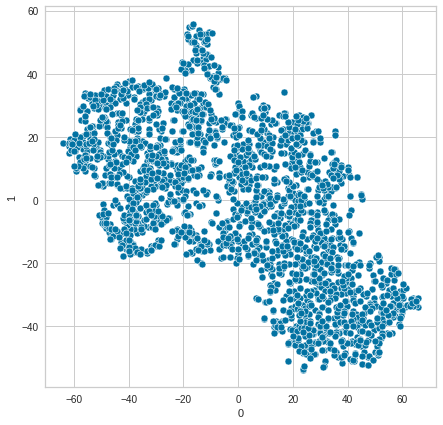

In [72]:
# Fitting T-SNE with number of components equal to 2 to visualize how data is distributed

tsne = TSNE(n_components = 2, random_state = 1, perplexity = 35)        # Initializing T-SNE with number of component equal to 2, random_state=1, and perplexity=35

data_air_pol_tsne = tsne.fit_transform(df_scaled)                            # fit_transform T-SNE on new data

data_air_pol_tsne = pd.DataFrame(data_air_pol_tsne, columns=[0, 1])           # Converting the embeddings to a dataframe

plt.figure(figsize=(7, 7))                                                    # Scatter plot for two components

sns.scatterplot(x=0, y=1, data=data_air_pol_tsne)                             # Plotting T-SNE

**Observation and Insights:**

### **Applying PCA**

**Think about it:**
- Should we apply clustering algorithms on the current data or should we apply PCA on the data before applying clustering algorithms? How would this help?

When the variables used in clustering are highly correlated, it causes multicollinearity, which affects the clustering method and results in poor cluster profiling (or biased toward a few variables). PCA can be used to reduce the multicollinearity between the variables. 

In [73]:
# Defining the number of principal components to generate
n = data_model.shape[1]                                        # Storing the number of variables in the data

pca = PCA(n_components = n, random_state = 1)                                        # Initialize PCA with n_components = n and random_state=1

data_pca = pd.DataFrame(pca.fit_transform(df_scaled))                     # fit_transform PCA on the scaled data

# The percentage of variance explained by each principal component is stored
exp_var = pca.explained_variance_ratio_                     

**Let's plot the first two components and see how the data points are distributed.**

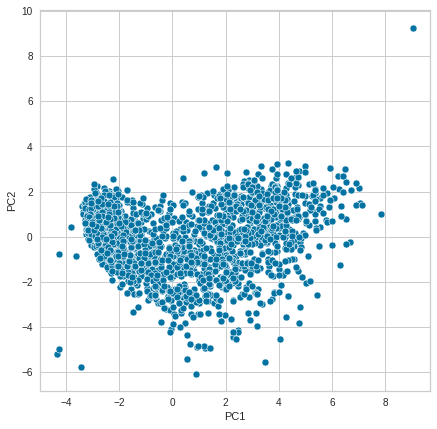

In [74]:
# Scatter plot for two components using the dataframe data_pca
plt.figure(figsize = (7, 7))

sns.scatterplot(data=data_pca,x=data_pca[0],y=data_pca[1])

plt.xlabel("PC1")

plt.ylabel("PC2")

plt.show()

**Let's apply clustering algorithms on the data generated after applying PCA**

## **K-Means** 

In [75]:
distortions = []                                                  # Create an empty list

K = range(2, 10)                                                  # Setting the K range from 2 to 10

for k in K:
    kmeanModel = KMeans(n_clusters=k,random_state=4)              # Initialize K-Means
    kmeanModel.fit(data_pca)                                      # Fit K-Means on the data
    distortions.append(kmeanModel.inertia_)                       # Append distortion values to the empty list created above

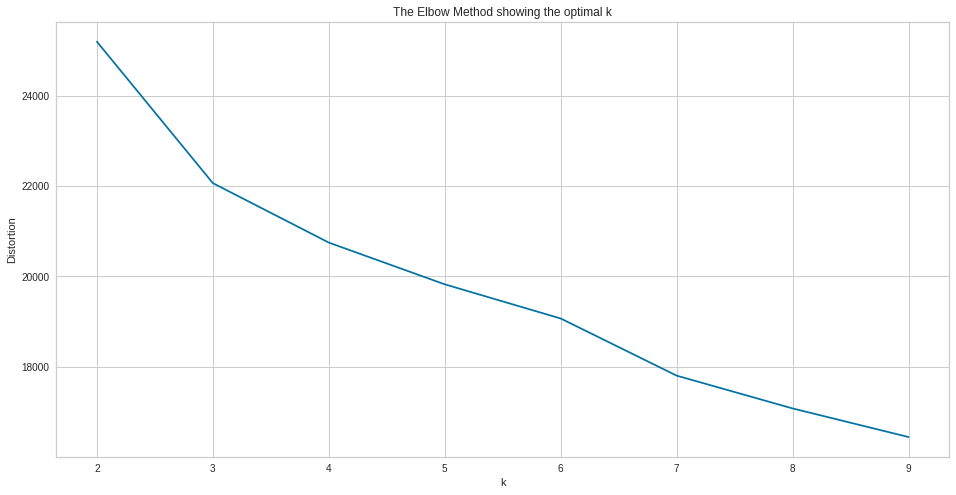

In [76]:
# Plotting the elbow plot
plt.figure(figsize=(16, 8))                                            # Setting the plot size

plt.plot(K, distortions, "bx-")                                        # Plotting the K on X-axis and distortions on y-axis

plt.xlabel("k")                                                        # Title of x-axis

plt.ylabel("Distortion")                                               # Title of y-axis

plt.title("The Elbow Method showing the optimal k")                    # Title of the plot
plt.show()

**In the above plot, the elbow is seen for K=3 and K=5 as there is some drop in distortion at K=3 and K=5.**

**Think About It:**

- How do we determine the optimal K value when the elbows are observed at 2 or more K values from the elbow curve?
- Which metric can be used to determine the final K value?

**We can use the silhouette score as a metric for different K values to make a better decision about picking the number of clusters(K).**

### **What is the silhouette score?**

Silhouette score is one of the methods for evaluating the quality of clusters created using clustering algorithms such as K-Means. The silhouette score is a measure of how similar an object is to its cluster (cohesion) compared to other clusters (separation). Silhouette score has a range of [-1, 1].

* Silhouette coefficients near +1 indicate that the clusters are dense and well separated, which is good.
* Silhouette score near -1 indicates that those samples might have been assigned to the wrong cluster.

**Finding silhouette score for each value of K**

In [77]:
sil_score = []                                                             # Creating empty list
cluster_list = range(3, 7)                                                 # Creating a range from 3 to 7
for n_clusters in cluster_list:
    
    # Initialize K-Means with number of clusters equal to n_clusters and random_state=1
    clusterer = KMeans(n_clusters = n_clusters, random_state = 1)
    
    # Fit and predict on the pca data
    preds = clusterer.fit_predict(data_pca) 
    
    # Calculate silhouette score - Hint: Use silhouette_score() function
    score = silhouette_score(data_pca, preds)  
    
    # Append silhouette score to empty list created above
    score         
    
    # Print the silhouette score
    print( "For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))  

For n_clusters = 3, the silhouette score is 0.26946844252320756)
For n_clusters = 4, the silhouette score is 0.25233389709421294)
For n_clusters = 5, the silhouette score is 0.23665346732660744)
For n_clusters = 6, the silhouette score is 0.12072467170633001)


**From the above silhouette scores, 3 appears to be a good value of K. So, let's build K-Means using K=3.**

### **Applying K-Means on data_pca**

In [78]:
kmeans = KMeans(n_clusters=3, random_state=1)                                 # Initialize the K-Means algorithm with 3 clusters and random_state=1

kmeans.fit(data_pca)                                        # Fitting on the data_pca

KMeans(n_clusters=3, random_state=1)

In [79]:
data_pca["K_means_segments_3"] = kmeans.labels_                    # Adding K-Means cluster labels to the data_pca data

data["K_means_segments_3"] = kmeans.labels_                        # Adding K-Means cluster labels to the whole data

data_model["K_means_segments_3"] = kmeans.labels_                  # Adding K-Means cluster labels to data_model

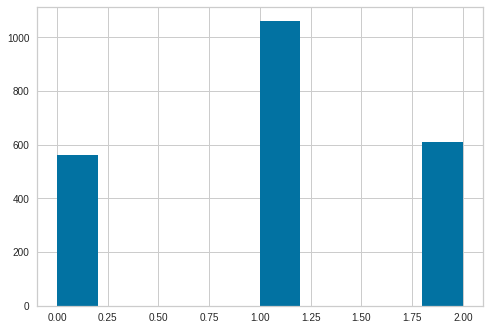

In [80]:
# Let's check the distribution
data_model["K_means_segments_3"].hist()

**Let's visualize the clusters using PCA**

In [81]:
# Function to visualize PCA data with clusters formed
def PCA_PLOT(X, Y, PCA, cluster):
    sns.scatterplot(x=X, y=1, data=PCA, hue=cluster)

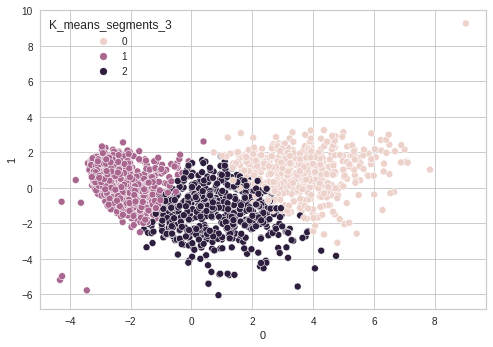

In [82]:
PCA_PLOT(0, 1, data_pca, "K_means_segments_3")

**Observations and Insights:**

### **Cluster Profiling**

In [83]:
# Taking the cluster-wise mean of all the variables. Hint: First groupby 'data' by 'K_means_segments_3' and then find mean
cluster_profile_KMeans_3 = data.groupby('K_means_segments_3').mean()

In [84]:
# Highlighting the maximum average value among all the clusters for each of the variables
cluster_profile_KMeans_3.style.highlight_max(color="lightgreen", axis=0)

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Kids,Family_Size,Expenses,NumTotalPurchases,Engaged_in_days,TotalAcceptedCmp,AmountPerPurchase
K_means_segments_3,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1968.131907,76353.955437,0.035651,0.208556,50.192513,630.928699,69.814617,468.520499,102.472371,71.438503,78.839572,1.349376,5.196078,6.133690,8.272727,2.878788,0.085561,0.130125,0.262032,0.215686,0.032086,0.007130,0.290553,47.868093,0.244207,0.244207,1422.014260,20.951872,548.317291,1.016043,73.482907
1,1970.984906,35557.287736,0.756604,0.476415,49.229245,45.238679,5.023585,23.592453,7.384906,5.126415,15.266038,2.027358,2.139623,0.571698,3.287736,6.368868,0.067925,0.015094,0.000000,0.000943,0.001887,0.010377,0.083962,45.015094,1.233019,1.233019,101.632075,8.026415,500.567925,0.169811,11.417586
2,1966.003273,57808.981997,0.278232,0.836334,47.857610,455.184943,23.335516,139.970540,30.463175,24.613748,62.080196,3.756137,6.476268,3.122750,7.909984,5.726678,0.070376,0.127660,0.024550,0.036007,0.014730,0.008183,0.134206,49.996727,1.114566,1.114566,735.648118,21.265139,595.201309,0.407529,34.461563


**Observations and Insights:**

**Let us create a boxplot for each of the variables**

In [85]:
# Columns to use in boxplot
col_for_box = ['Income','Kidhome','Teenhome','Recency','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth','Complain','Age','Family_Size','Expenses','NumTotalPurchases','Engaged_in_days','TotalAcceptedCmp','AmountPerPurchase']

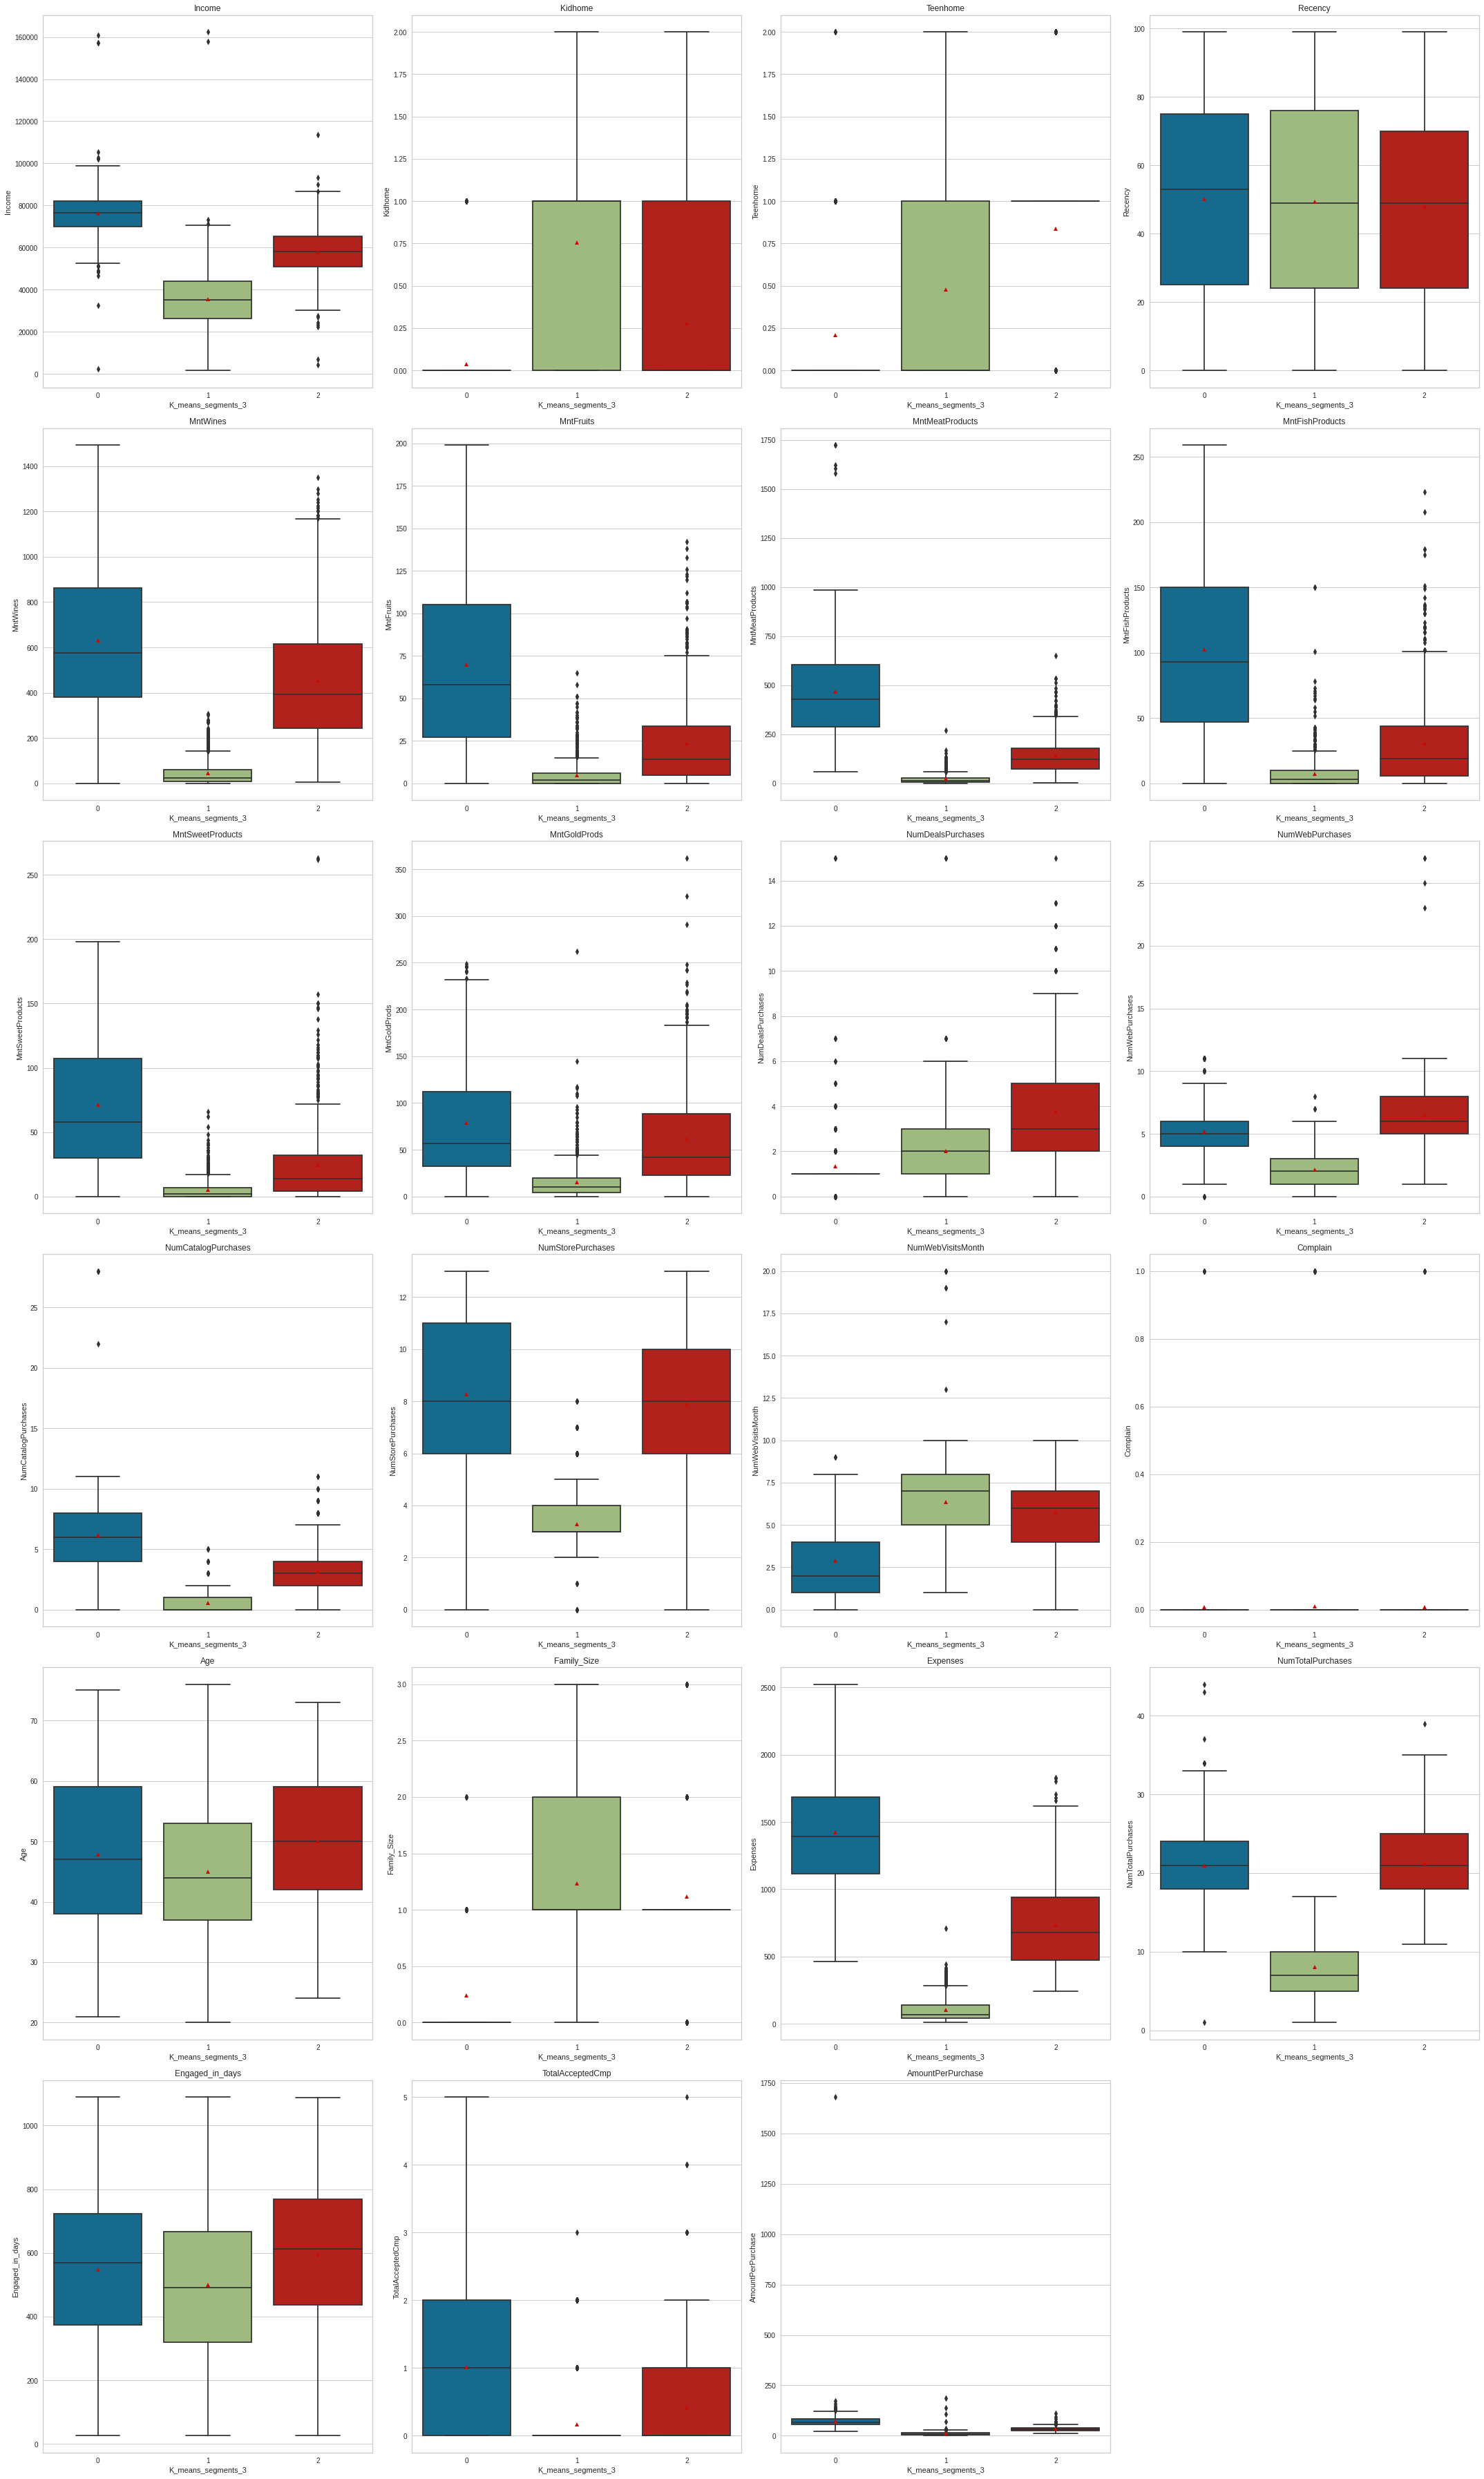

In [86]:
# Creating boxplot for each of the variables
all_col = col_for_box

plt.figure(figsize = (30, 50))

for i, variable in enumerate(all_col):
    plt.subplot(6, 4, i + 1)
    
    sns.boxplot(y=data[variable], x=data['K_means_segments_3'],showmeans=True)
    
    plt.tight_layout()
    
    plt.title(variable)

plt.show()

### **Characteristics of each cluster:**



**Cluster 0:__________**

**Summary for cluster 0:_______________** 

**Cluster 1:_______________**

**Summary for cluster 1:_______________**



**Cluster 2:_______________** 

**Summary for cluster 2:_______________**

**Think About It:**
- Are the K-Means profiles with K=3 providing any deep insights into customer purchasing behavior or which channels they are using?
- What is the next step to get more meaningful insights? 

We can see from the above profiles that K=3 segments the customers into High, Medium and Low-income customers, and we are not getting deep insights into different types of customers. So, let's try to build K=5 (which has another elbow in the Elbow curve) and see if we can get better cluster profiles.

In [88]:
# Dropping labels we got from K=3 since we will be using PCA data for prediction
# Drop K_means_segments_3. Hint: Use axis=1 and inplace=True
data_pca.drop(data_pca["K_means_segments_3"], inplace=True)
data.drop('K_means_segments_3', axis=1, inplace=True)

**Let's build K-Means using K=5**

In [ ]:
# Fit the K-Means algorithm using number of cluster as 5 and random_state=0 on data_pca


In [ ]:
# Add K-Means cluster labels to data_pca

# Add K-Means cluster labels to whole data

# Add K-Means cluster labels to data_model


In [ ]:
# Let's check the distribution


**Let's visualize the clusters using PCA**

In [ ]:
# Hint: Use PCA_PLOT function created above


### **Cluster Profiling**

In [ ]:
# Take the cluster-wise mean of all the variables. Hint: First groupby 'data' by cluster labels column and then find mean


In [ ]:
# Highlight the maximum average value among all the clusters for each of the variables

**Let's plot the boxplot**

In [ ]:
# Create boxplot for each of the variables


### **Characteristics of each cluster**

**Cluster 0:__________**

**Summary for cluster 0:_______________** 

**Cluster 1:_______________**

**Summary for cluster 1:_______________**


**Cluster 2:_______________** 

**Summary for cluster 2:_______________**

**Cluster 3:_______________** 

**Summary for cluster 3:_______________**

**Cluster 4:_______________** 

**Summary for cluster 4:_______________**

In [ ]:
# Dropping labels we got from K-Means since we will be using PCA data for prediction
# Hint: Use axis=1 and inplace=True
data_pca._____________
data.____________

From the above profiles, K=5 provides more interesting insights about customer's purchasing behavior and preferred channels for purchasing products. We can also see that the High, Medium and Low income groups have different age groups and preferences, which was not evident in K=3. So, **we can choose K=5.**

## **K-Medoids**

**Let's find the silhouette score for K=5 in K-Medoids**

In [ ]:
kmedo = ____________           # Initializing K-Medoids with number of clusters as 5 and random_state=1

preds = ___________            # Fit and predict K-Medoids using data_pca

score = ____________           # Calculate the silhouette score

print(score)                   # Print the score

**Observations and Insights:**

In [ ]:
# Predicting on data_pca and ddding K-Medoids cluster labels to the whole data

# Predicting on data_pca and ddding K-Medoids cluster labels to data_model

# Predicting on data_pca and ddding K-Medoids cluster labels to data_pca


In [ ]:
# Let's check the distribution


**Let's visualize the clusters using PCA**

In [ ]:
# Hint: Use PCA_PLOT function created above


### **Cluster Profiling**

In [ ]:
# Take the cluster-wise mean of all the variables. Hint: First group 'data' by cluster labels column and then find mean


In [ ]:
# Highlight the maximum average value among all the clusters for each of the variables


**Let's plot the boxplot**

In [ ]:
# Create boxplot for each of the variables


### **Characteristics of each cluster**

**Cluster 0:__________**

**Summary for cluster 0:_______________** 

**Cluster 1:_______________**

**Summary for cluster 1:_______________**


**Cluster 2:_______________** 

**Summary for cluster 2:_______________**

**Cluster 3:_______________** 

**Summary for cluster 3:_______________**

**Cluster 4:_______________** 

**Summary for cluster 4:_______________**

In [ ]:
# Dropping labels we got from K-Medoids since we will be using PCA data for prediction
# Hint: Use axis=1 and inplace=True
data_pca._____________
data.____________

## **Hierarchical Clustering**

Let's find the Cophenetic correlation for different distances with different linkage methods.

### **What is a Cophenetic correlation?**

The cophenetic correlation coefficient is a correlation coefficient between the cophenetic distances(Dendrogramic distance) obtained from the tree, and the original distances used to construct the tree. It is a measure of how faithfully a dendrogram preserves the pairwise distances between the original unmodeled data points. 

The cophenetic distance between two observations is represented in a dendrogram by the height of the link at which those two observations are first joined. That height is the distance between the two subclusters that are merged by that link.

Cophenetic correlation is the way to compare two or more dendrograms. 

**Let's calculate Cophenetic correlation for each of the distance metrics with each of the linkage methods**

In [ ]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average"]

high_cophenet_corr = 0                                                 # Creating a variable by assigning 0 to it
high_dm_lm = [0, 0]                                                    # Creating a list by assigning 0's to it

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(data_pca, metric=dm, method=lm)                    # Applying different linkages with different distance on data_pca
        c, coph_dists = cophenet(Z, pdist(data_pca))                   # Calculating cophenetic correlation
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:                                     # Checking if cophenetic correlation is higher than previous score
            high_cophenet_corr = c                                     # Appending to high_cophenet_corr list if it is higher
            high_dm_lm[0] = dm                                         # Appending its corresponding distance
            high_dm_lm[1] = lm                                         # Appending its corresponding method or linkage

In [ ]:
# Printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

**Let's have a look at the dendrograms for different linkages with `Cityblock distance`**

In [ ]:
# List of linkage methods
linkage_methods = ["single", "complete", "average"]

# Lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# To create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))            # Setting the plot size

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(data_pca, metric="Cityblock", method=method)                  # Measures the distances between two clusters

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")           # Title of dendrogram

    coph_corr, coph_dist = cophenet(Z, pdist(data_pca))                       # Finding cophenetic correlation for different linkages with city block distance
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

**Observations and Insights:**

**Think about it:**

- Can we clearly decide the number of clusters based on where to cut the dendrogram horizontally?
- What is the next step in obtaining number of clusters based on the dendrogram?

**Let's have a look at the dendrograms for different linkages with `Chebyshev distance`**

In [ ]:
# Plot the dendrogram for Chebyshev distance with linkages single, complete and average. 
# Hint: Use Chebyshev distance as the metric in the linkage() function 


**Observations and Insights:**

**Let's have a look at the dendrograms for different linkages with Mahalanobis distance**

In [ ]:
# Plot the dendrogram for Mahalanobis distance with linkages single, complete and average. 
# Hint: Use Mahalanobis distance as the metric in the linkage() function 


**Observations and Insights:**

**Let's have a look at the dendrograms for different linkages with Euclidean distance**

In [ ]:
# Plot the dendrogram for Euclidean distance with linkages single, complete, average and ward. 
# Hint: Use Euclidean distance as the metric in the linkage() function 


**Think about it:**

- Are there any distinct clusters in any of the dendrograms?

**Observations and Insights:**

In [ ]:
# Initialize Agglomerative Clustering with affinity (distance) as Euclidean, linkage as 'Ward' with clusters=3
HCmodel = AgglomerativeClustering(n_clusters=______, affinity=______, linkage=______,) 

# Fit on data_pca
HCmodel.__________                                                                  

In [ ]:
# Add Agglomerative Clustering cluster labels to data_pca

# Add Agglomerative Clustering cluster labels to the whole data

# Add Agglomerative Clustering cluster labels to data_model

In [ ]:
# Let's check the distribution


**Let's visualize the clusters using PCA.**

In [ ]:
# Hint: Use PCA_PLOT function created above


### **Cluster Profiling**

In [ ]:
# Take the cluster-wise mean of all the variables. Hint: First group 'data' by cluster labels column and then find mean


In [ ]:
# Highlight the maximum average value among all the clusters for each of the variables


**Let's plot the boxplot**

In [ ]:
# Create boxplot for each of the variables


### **Characteristics of each cluster**

**Cluster 0:__________**

**Summary for cluster 0:_______________** 

**Cluster 1:_______________**

**Summary for cluster 1:_______________**


**Cluster 2:_______________** 

**Summary for cluster 2:_______________**

**Observations and Insights:**

In [ ]:
# Dropping labels we got from Agglomerative Clustering since we will be using PCA data for prediction
# Hint: Use axis=1 and inplace=True
data_pca._____________
data.____________

## **DBSCAN**

DBSCAN is a very powerful algorithm for finding high-density clusters, but the problem is determining the best set of hyperparameters to use with it. It includes two hyperparameters, `eps`, and `min samples`.

Since it is an unsupervised algorithm, you have no control over it, unlike a supervised learning algorithm, which allows you to test your algorithm on a validation set. The approach we can follow is basically trying out a bunch of different combinations of values and finding the silhouette score for each of them.

In [ ]:
# Initializing lists
eps_value = [2,3]                       # Taking random eps value
min_sample_values = [6,20]              # Taking random min_sample value

# Creating a dictionary for each of the values in eps_value with min_sample_values
res = {eps_value[i]: min_sample_values for i in range(len(eps_value))}  

In [ ]:
# Finding the silhouette_score for each of the combinations
high_silhouette_avg = 0                                               # Assigning 0 to the high_silhouette_avg variable
high_i_j = [0, 0]                                                     # Assigning 0's to the high_i_j list
key = res.keys()                                                      # Assigning dictionary keys to a variable called key
for i in key:
    z = res[i]                                                        # Assigning dictionary values of each i to z
    for j in z:
        db = DBSCAN(eps=i, min_samples=j).fit(data_pca)               # Applying DBSCAN to each of the combination in dictionary
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_
        silhouette_avg = silhouette_score(data_pca, labels)           # Finding silhouette score 
        print( 
            "For eps value =" + str(i),
            "For min sample =" + str(j),
            "The average silhoutte_score is :",
            silhouette_avg,                                          # Printing the silhouette score for each of the combinations
        )
        if high_silhouette_avg < silhouette_avg:                     # If the silhouette score is greater than 0 or the previous score, it will get appended to the high_silhouette_avg list with its combination of i and j              
            high_i_j[0] = i
            high_i_j[1] = j

In [ ]:
# Printing the highest silhouette score
print("Highest_silhoutte_avg is {} for eps = {} and min sample = {}".format(high_silhouette_avg, high_i_j[0], high_i_j[1]))

**Now, let's apply DBSCAN using the hyperparameter values we have received above.**

In [ ]:
# Apply DBSCAN using the above hyperparameter values
dbs = _____________________

In [ ]:
# fit_predict on data_pca and add DBSCAN cluster labels to the whole data

# fit_predict on data_pca and add DBSCAN cluster labels to data_model

# fit_predict on data_pca and add DBSCAN cluster labels to data_pca

In [ ]:
# Let's check the distribution


**Let's visualize the clusters using PCA.**

In [ ]:
# Hint: Use PCA_PLOT function created above


**Observations and Insights:**

**Think about it:**

- Changing the eps and min sample values will result in different DBSCAN results? Can we try more value for eps and min_sample?

**Note:** You can experiment with different eps and min_sample values to see if DBSCAN produces good distribution and cluster profiles.

In [ ]:
# Dropping labels we got from DBSCAN since we will be using PCA data for prediction
# Hint: Use axis=1 and inplace=True
data_pca._____________
data.____________

## **Gaussian Mixture Model**

**Let's find the silhouette score for K=5 in Gaussian Mixture**

In [ ]:
gmm = GaussianMixture(_______) # Initialize Gaussian Mixture Model with number of clusters as 5 and random_state=1

preds = ___________            # Fit and predict Gaussian Mixture Model using data_pca

score = ____________           # Calculate the silhouette score

print(score)                   # Print the score

**Observations and Insights:**

In [ ]:
# Predicting on data_pca and add Gaussian Mixture Model cluster labels to the whole data

# Predicting on data_pca and add Gaussian Mixture Model cluster labels to data_model

# Predicting on data_pca and add Gaussian Mixture Model cluster labels to data_pca


In [ ]:
# Let's check the distribution


**Let's visualize the clusters using PCA.**

In [ ]:
# Hint: Use PCA_PLOT function created above


### **Cluster Profiling**

In [ ]:
# Take the cluster-wise mean of all the variables. Hint: First group 'data' by cluster labels column and then find mean


In [ ]:
# Highlight the maximum average value among all the clusters for each of the variables


**Let's plot the boxplot**

In [ ]:
# Create boxplot for each of the variables


### **Characteristics of each cluster**

**Cluster 0:__________**

**Summary for cluster 0:_______________** 

**Cluster 1:_______________**

**Summary for cluster 1:_______________**


**Cluster 2:_______________** 

**Summary for cluster 2:_______________**

**Cluster 3:_______________** 

**Summary for cluster 3:_______________**

**Cluster 4:_______________** 

**Summary for cluster 4:_______________**

## **Conclusion and Recommendations**

- **Refined Insights:** What are the most meaningful insights from the data relevant to the problem?

- **Comparison of various techniques and their relative performance:** How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

- **Proposal for the final solution design:** What model do you propose to be adopted? Why is this the best solution to adopt?